# Final Project Report: `Pokémon Stats Analysis`

##  Introduction

Pokémon is a global icon to children and adults everywhere. When I was in primary shcool, I once played a game called *Pokémon Emerald*, which was my first contact with things related to Pokémon. And nowadays, some main characters in Pokémon such as Pikachu, Zenigame(a.k.a Squirtle) and Koduck(a.k.a Psyduck) are very popular on the Internet in China as funny memes. 

So when I found a dataset about Pokémon by coincidence, I think it’s a quite interesting theme for my final project to do some Pokémon stats analysis and visualization using python skills I learned from this semester. That's why I chose this dataset.

In the process of completing the report, I found that some of the charts I learned in our python course were not good enough to make a nice visualization of this data, so I used another methods I learned online - `Seaborn` as a supplement to `Matplotlib.pylpot` and `pandas.plotting` so that to plot new kinds of diagrams like Swarmplot, PairGrid, Violinplot and so on to make my report more beautiful and complete or simplize the process of visualization.

###### 
`Pokemon.csv` includes 721 Pokémon, including their id number, name, first and second type, generation, whether they are LEGENDARY or not and basic stats: HP, Attack, Defense, Special Attack, Special Defense, Speed and the sum of all these basic stats.

They are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games(like Pokémon Emerald that I've mentioned above, but NOT Pokémon cards or *Pokémon Go*). Use this data, we can explore what characteristics can attribute to the victory in a combat between Pokémon.

I downloaded this dataset from `datafountain.cn`. Then I found that there is a same Pokémon dataset provided by Alberto Barradas on `kaggle` with more detailed information, so I guess that kaggle is the initial origin of the data.

Anyway, as the direct sources of my dataset and other relevant information, `datafountain.cn` and `kaggle` do help me a lot on attaining and comprehending this dataset.

The data as described by Myles O'Neill is:

|Attribute|Defination|
|:--------|:---------|
|#        |ID for each Pokémon|
|Name     |Name for each Pokémon|
|Type 1   |Each Pokémon has a type, this determines weakness/resistance to attacks|
|Type 2   |Some Pokémon are dual type and have 2|
|Total    |Sum of all stats that come after this, a general guide to how strong a Pokémon is|
|HP       |Hit points, or health, defines how much damage a Pokémon can withstand before fainting|
|Attack   |The base modifier for normal attacks(eg. scratch, punch)|
|Defense  |The base damage resistance against normal attacks|
|Sp. Atk   |Special attack, the base modifier for special attacks(eg. fire blast, bubble beam)|
|Sp. Def   |Special defense, the base damage resistance against special attacks|
|Speed    |Determines which Pokémon attacks first round|

And the structure of my final project report is as follows:

## Content

- [Introduction](#Introduction)
- [1 Preparation](#1-Preparation)
 - [1.1 Notebook Prep](#1.1-Notebook-Prep)
 - [1.2 Data Import and Preprocessing](#1.2-Data-Import-and-Preprocessing)
- [2 Data Analysis and Visualization](#2-Data-Analysis-and-Visualization)
 - [2.1 Basic Statistics](#2.1-Basic-Statistics)
 - [2.2 Top 10 Pokémon with Highest/Lowest **Total** Value](#2.2-Top-10-Pokémon-with-Highest/Lowest-Total-Value)
 - [2.3 About **Type 1**](#2.3-About-Type-1)
 - [2.4 About **Generation**](#2.4-About-Generation)
 - [2.5 About **Legendary**](#2.5-About-Legendary)
- [3 Summary](#3-Summary)

## 1 Preparation

### 1.1 Notebook Prep

Firstly, import the packages that will be used below and do some pre-setting at the beginning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")
%matplotlib inline

### 1.2 Data Import and Preprocessing

Now, import the dataset and see what's I'm dealing with.

In [3]:
# read the csv file and save it into a variable
pkm_raw = pd.read_csv('Pokemon.csv')

# see first 5 lines of the dataframe
pkm_raw.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# see some basic information about the dataframe
pkm_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


We can see that there are 800 Pokémon in total. The dtypes of all the columns are matched with our demand for further analysis, but there are some missing data in column 'Type 2', since not all Pokémon have a second type. Afterwards I'll mainly focus on the discrepancy between different first types, different generations and Legendary or not. So I'll just keep column 'Type 2' as it is and won't use it to do any further analysis next.

Then use the `.rename` and `.set_index` methods to make the structure of the dataframe more intuitive.

In [5]:
# rename column "#" as "ID" and set "Type 1" and "Name" as index
pkm = pkm_raw.set_index(['Type 1', 'Name']).rename(columns={"#": "ID"})

# see first 5 lines of the dataframe
pkm.head()

ID  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
Type 1 Name                                                                     
Grass  Bulbasaur               1  Poison    318  45      49       49       65   
       Ivysaur                 2  Poison    405  60      62       63       80   
       Venusaur                3  Poison    525  80      82       83      100   
       VenusaurMega Venusaur   3  Poison    625  80     100      123      122   
Fire   Charmander              4     NaN    309  39      52       43       60   

                              Sp. Def  Speed  Generation  Legendary  
Type 1 Name                                                          
Grass  Bulbasaur                   65     45           1      False  
       Ivysaur                     80     60           1      False  
       Venusaur                   100     80           1      False  
       VenusaurMega Venusaur      120     80           1      False  
Fire   Charmander                  50     65           1      False

## 2 Data Analysis and Visualization

### 2.1 Basic Statistics

To begin with, let’s take a look at some basic statistics.

In [6]:
# show some basic statistics of the data
pkm.describe()

,ID,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


The generated dataframe shows us the count number of non-NA/null observations, mean of the values, standard deviation of the observations and so on. Later I'll use these statistics to do some comparison among different Pokémon.

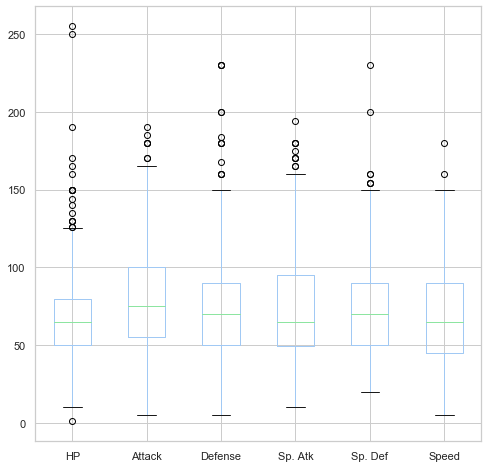

In [7]:
# boxplot

pkm[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].plot.box(figsize=(8,8));

The box-plot vividly illustrates the condition of data dispersion. The distributions of **HP, Attack, Defense, Sp.Def** and **Speed** are almost symmetric, while the distribution of **Sp.Atk** shows positive skewness.

(Here I didn't use "Total" because it's the sum of other numeric stats so it's much larger, which may make the box figure of other stats less legible.)

### 2.2 Top 10 Pokémon with Highest/Lowest **Total** Value

**Total** is the sum of **HP**, **Attack**, **Defense**, **Sp. Atk**, **Sp.Def** and **Speed**. Therefore, it is a measure of the comprehensive ability of Pokémon to some extend.

In [8]:
# Top 10 Pokémon with highest Total value
total_top10_high = pkm_raw.sort_values(by = ['Total'], ascending = False).head(10)

total_top10_high

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False


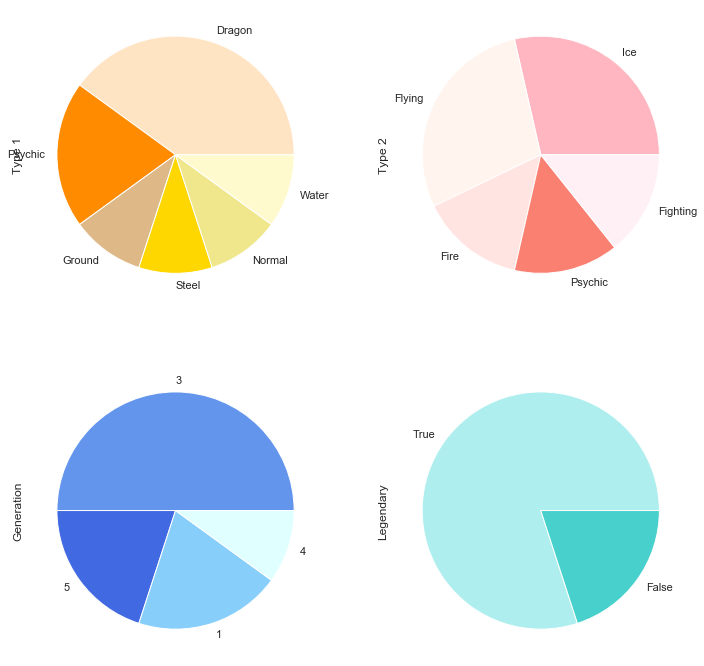

In [9]:
fig = plt.figure(figsize=(12,12))  

# show the ratio of the first type
ax1 = fig.add_subplot(2,2,1)  
total_top10_high['Type 1'].value_counts().plot.pie(colors=['#FFE4C4', '#FF8C00', '#DEB887', '#FFD700', '#F0E68C', '#FFFACD'])

# show the ratio of the second type
ax2 = fig.add_subplot(2,2,2)  
total_top10_high['Type 2'].value_counts().plot.pie(colors=['#FFB6C1', '#FFF5EE', '#FFE4E1', '#FA8072', '#FFF0F5'])

# show the ratio of generation
ax3 = fig.add_subplot(2,2,3)  
total_top10_high['Generation'].value_counts().plot.pie(colors=['#6495ED', '#4169E1', '#87CEFA', '#E0FFFF'])

# show the ratio of legendary Pokémon
ax4 = fig.add_subplot(2,2,4)  
total_top10_high['Legendary'].value_counts().plot.pie(colors=['#AFEEEE', '#48D1CC', '#F0FFF0', '#90EE90']);

In [10]:
# Top 10 Pokémon with lowest Total value
total_top10_low = pkm_raw.sort_values(by = ['Total']).head(10)

total_top10_low

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
446,401,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False
288,265,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
303,280,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
732,664,Scatterbug,Bug,NaN,200,38,35,40,27,25,35,6,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
381,349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False


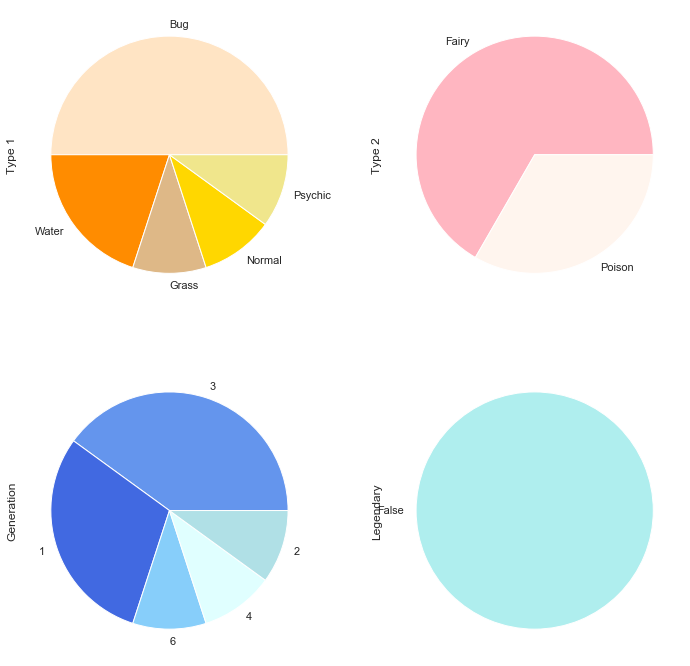

In [81]:
fig = plt.figure(figsize=(12,12))  

# show the ratio of the first type
ax1 = fig.add_subplot(2,2,1)  
total_top10_low['Type 1'].value_counts().plot.pie(colors=['#FFE4C4', '#FF8C00', '#DEB887', '#FFD700', '#F0E68C', '#FFFACD'])

# show the ratio of the second type
ax2 = fig.add_subplot(2,2,2)  
total_top10_low['Type 2'].value_counts().plot.pie(colors=['#FFB6C1', '#FFF5EE', '#FFE4E1', '#FA8072', '#FFF0F5'])

# show the ratio of generation
ax3 = fig.add_subplot(2,2,3)  
total_top10_low['Generation'].value_counts().plot.pie(colors=['#6495ED', '#4169E1', '#87CEFA', '#E0FFFF', '#B0E0E6'])

# show the ratio of legendary Pokémon
ax4 = fig.add_subplot(2,2,4)  
total_top10_low['Legendary'].value_counts().plot.pie(colors=['#AFEEEE', '#48D1CC', '#F0FFF0', '#90EE90']);

As the four pie charts clearly indicates to us, among the top 10 Pokemon with highest **Total** value, the most common are Pokemon with **Dragon** type, followed by **Psychic** type. Half of them belongs to Generation 3, and most of them are **Legendary** . As to the top 10 Pokémon with lowest **Total** value,  the most common are Pokemon with **Bug** type, followed by **Water** type. The majority of them belong to Generation 1 or 3, and all of them are **not Legendary**. 

My guess is that Pokémon which have the first type of **Dragon** and are **Legendary** tend to be the most powerful when fighting with others. On the contrary, Pokémon which have the first type of **Bug** and are **not Legendary** are more likely to be weak in combating. 

Obviously the information of top 10 Pokemon with highest/lowest **Total** value can only be seen just as a reference. The more relevant factors to winning a combat remains to be find in the further analysis below.

### 2.3 About Type 1

Let's see some information of first type.

In [12]:
# count the number of different types of Pokémon
type1_count = pkm_raw["Type 1"].value_counts()

type1_count

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [13]:
# the number of kinds of first type
len(type1_count)

18

- #### `Pie Chart`

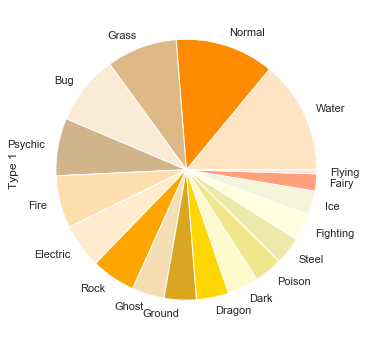

In [14]:
# pie chart
type1_pie = type1_count.plot.pie(colors=['#FFE4C4', '#FF8C00', '#DEB887', '#FAEBD7', '#D2B48C', '#FFDEAD', 
                             '#FFEBCD', '#FFA500', '#F5DEB3', '#DAA520', '#FFD700', '#FFFACD', 
                             '#F0E68C', '#EEE8AA', '#FFFFE0', '#F5F5DC', '#FFA07A', '#FFE4E1'],
                     figsize=(6,6))
type1_pie;

In this part we'll focus on **Type 1**, so **ID, Type 2, Total, Legendary** and **Generation** are unneccessary columns. Drop them to generate a new dataframe named *pkm_stats_type1*.

In [15]:
pkm_stats_type1 = pkm.drop(columns=['ID', 'Type 2', 'Total', 'Legendary', 'Generation'])
pkm_stats_type1

HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Type 1  Name                                                               
Grass   Bulbasaur              45      49       49       65       65     45
        Ivysaur                60      62       63       80       80     60
        Venusaur               80      82       83      100      100     80
        VenusaurMega Venusaur  80     100      123      122      120     80
Fire    Charmander             39      52       43       60       50     65
...                            ..     ...      ...      ...      ...    ...
Rock    Diancie                50     100      150      100      150     50
        DiancieMega Diancie    50     160      110      160      110    110
Psychic HoopaHoopa Confined    80     110       60      150      130     70
        HoopaHoopa Unbound     80     160       60      170      130     80
Fire    Volcanion              80     110      120      130       90     70

[800 rows x 6 columns]

- #### `Violinplot`

Use `.melt` skill, integrate **HP, Attack, Defense, Sp.Atk, Sp.Def** and **Speed** into **variable**.

In [16]:
# reshape the dataframe into a "long-form" data
pkm_long = pkm_raw.melt(id_vars=["Name", "#", "Type 1", "Type 2", "Generation", "Legendary", "Total"])

pkm_long

,Name,#,Type 1,Type 2,Generation,Legendary,Total,variable,value
0,Bulbasaur,1,Grass,Poison,1,False,318,HP,45
1,Ivysaur,2,Grass,Poison,1,False,405,HP,60
2,Venusaur,3,Grass,Poison,1,False,525,HP,80
3,VenusaurMega Venusaur,3,Grass,Poison,1,False,625,HP,80
4,Charmander,4,Fire,NaN,1,False,309,HP,39
...,...,...,...,...,...,...,...,...,...
4795,Diancie,719,Rock,Fairy,6,True,600,Speed,50
4796,DiancieMega Diancie,719,Rock,Fairy,6,True,700,Speed,110
4797,HoopaHoopa Confined,720,Psychic,Ghost,6,True,600,Speed,70
4798,HoopaHoopa Unbound,720,Psychic,Dark,6,True,680,Speed,80


As I've mentioned in *2.2*, **Total** is a measure of the comprehensive ability of Pokémon to some extend. For this reason, I'll use a `Violinplot` to depict the inter-type difference of **Total** so that to compare their comprehensive ability.

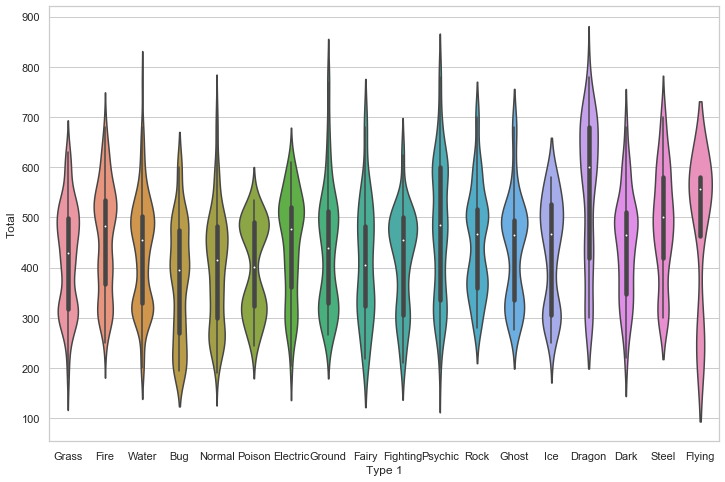

In [17]:
# Violinplot

plt.figure(figsize=(12, 8))
type1_violinplot = sns.violinplot(x="Type 1", y="Total", data=pkm_long);
plt.show()

This violinplot unfolded that Pokémon of **Dragon** type seems to be the most outstanding - their ability values are concentrated in higher level. And Pokémon of **Flying** type ia also better than others.

- #### `Swarmplot`

Then we can use the "long" dataframe to draw a **Swarmplot**, depicting the discrepancy of various basic stats distritutions between different types.

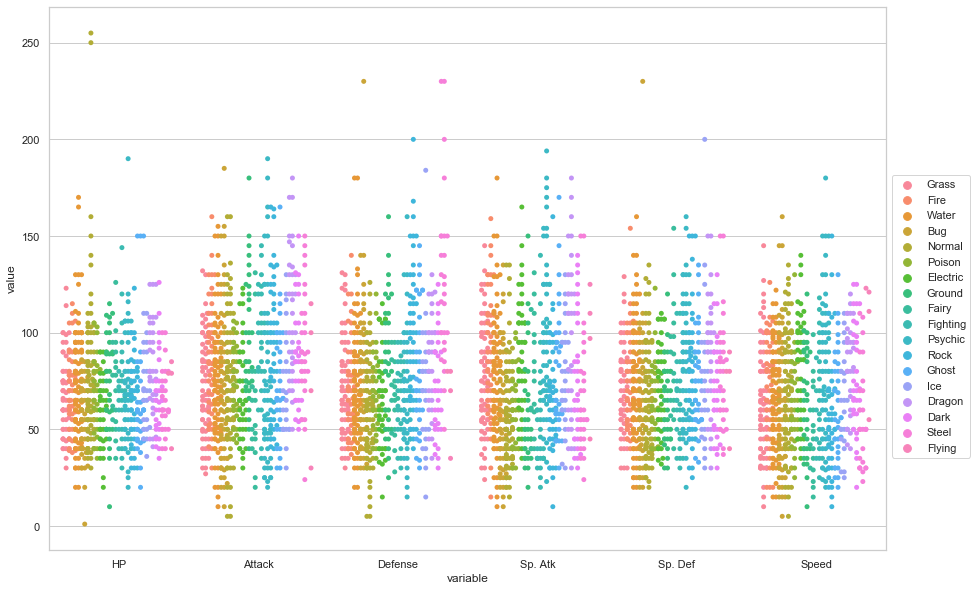

In [18]:
# swarmplot

plt.figure(figsize=(15, 10))
type1_swarmplot = sns.swarmplot(x="variable", y="value", hue="Type 1",
              data=pkm_long, dodge=True);
type1_swarmplot.legend(loc='best', bbox_to_anchor=(1, 0.7))
plt.show()

To compute the accurate mean value of these basic stats, use `.pivot_table` method to generate a "wide" dataframe, then calculate the mean value of "variable", and use `.unstack` skill to reshape the table at the end.

In [19]:
pkm_wide1 = pkm_long.pivot_table(
    index="Generation",
    columns=["Type 1", "Name", "variable"],
    values="value"
)
type1_mean = pkm_wide1.stack(level="Name").mean().unstack()

type1_mean

variable,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,70.971014,70.724638,56.884058,53.869565,64.797101,61.681159
Dark,88.387097,70.225806,66.806452,74.645161,69.516129,76.161290
Dragon,112.125000,86.375000,83.312500,96.843750,88.843750,83.031250
Electric,69.090909,66.295455,59.795455,90.022727,73.704545,84.500000
Fairy,61.529412,65.705882,74.117647,78.529412,84.705882,48.588235
Fighting,96.777778,65.925926,69.851852,53.111111,64.703704,66.074074
Fire,84.769231,67.769231,69.903846,88.980769,72.211538,74.442308
Flying,78.750000,66.250000,70.750000,94.250000,72.500000,102.500000
Ghost,73.781250,81.187500,64.437500,79.343750,76.468750,64.343750


In [20]:
# pre-judge whether the inter-type difference is significant
type1_mean.describe()

variable,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,80.956622,75.776927,69.262080,74.523722,73.219136,69.131196
std,12.888090,15.956643,6.123653,15.142395,7.964463,12.853200
min,61.529412,59.846939,56.884058,53.111111,62.750000,48.588235
25%,72.866071,66.642644,65.724340,61.156656,65.976858,62.311012
50%,74.415179,70.475222,69.877849,76.156250,72.355769,65.154018
75%,91.624552,79.127232,72.046875,86.571514,76.424479,75.731545
max,112.125000,126.370370,83.312500,98.403509,88.843750,102.500000


We can see that for each numeric indicator, the standard error and the difference between maximum and minimum value is not small. This preliminarily shows that there are significant differences between Pokémon of different first types.

- #### `Bar Plot`

After getting a dataframe of the accurate values of the mean values of all kinds of basic numeric stats, we can use bar-plot to illustrate them vividly.

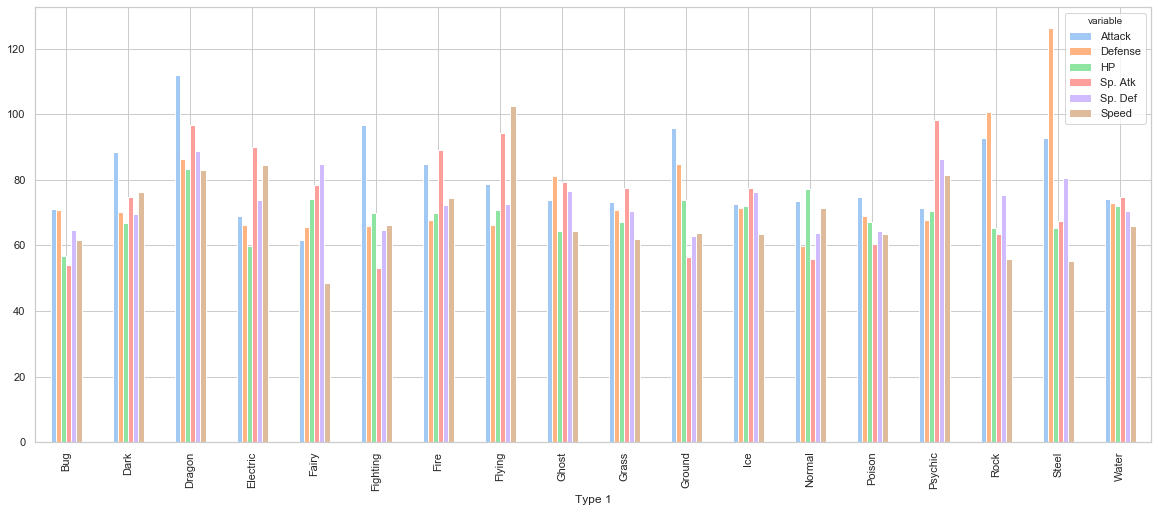

In [21]:
type1_barplot1 = type1_mean.plot.bar(figsize=[20,8])
type1_barplot1;

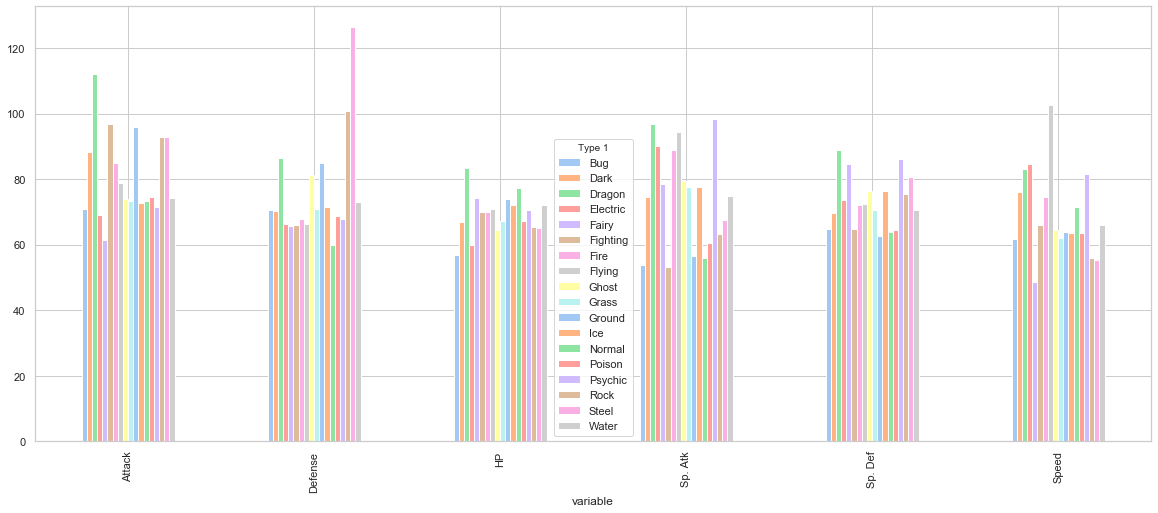

In [22]:
# use the transpose of the table to draw another bar-plot
type1_barplot2 = type1_mean.T.plot.bar(figsize=[20,8])
type1_barplot2;

These two different kinds of bar-plot we generated above provide two dimentions of analysis:
>- *For each type, what's their strength and what's their weakness?*
>- *For each numeric attribute, which type performs best and which one is the worst?*

Due to the large scale of this dataset, the outcome that bar-plots gave to us is not so legible. We still need to do use other tools to show more accurate consequence.

At the beginning, consider about the first question:
> *For each type, what's their strength and what's their weakness?*

To answer the first question, use `.sort_value` skill to sort these statistics.

In [23]:
type1_mean.T.columns 

# to get a list of Type 1:'type1' and copy to the next cell

Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object', name='Type 1')

In [24]:
type1 = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water']

# generate the ranks of all the basic stats
for types in type1:
    print('The rank of basic stats of', types, 'is:')
    print(type1_mean.T.unstack()[types].sort_values(ascending=False))

The rank of basic stats of Bug is:
variable
Attack     70.971014
Defense    70.724638
Sp. Def    64.797101
Speed      61.681159
HP         56.884058
Sp. Atk    53.869565
dtype: float64
The rank of basic stats of Dark is:
variable
Attack     88.387097
Speed      76.161290
Sp. Atk    74.645161
Defense    70.225806
Sp. Def    69.516129
HP         66.806452
dtype: float64
The rank of basic stats of Dragon is:
variable
Attack     112.12500
Sp. Atk     96.84375
Sp. Def     88.84375
Defense     86.37500
HP          83.31250
Speed       83.03125
dtype: float64
The rank of basic stats of Electric is:
variable
Sp. Atk    90.022727
Speed      84.500000
Sp. Def    73.704545
Attack     69.090909
Defense    66.295455
HP         59.795455
dtype: float64
The rank of basic stats of Fairy is:
variable
Sp. Def    84.705882
Sp. Atk    78.529412
HP         74.117647
Defense    65.705882
Attack     61.529412
Speed      48.588235
dtype: float64
The rank of basic stats of Fighting is:
variable
Attack     96.7

The result is matched with the bar-plot 1 above. But at the same time, it's too long to read.

What else can we do to make it more clear and legible?

- #### `Radar Map`

Recall the mean value of the whole dataset we calculated before:

|Attribute|Mean Value|
|:--------|:---------|
|Total    |435.10250|
|HP       |69.258750|
|Attack   |79.001250|
|Defense  |73.842500|
|Sp. Atk  |72.820000|
|Sp. Def  |71.902500|
|Speed    |68.277500|

Use **Radar map** to show the ability of Pokémon with different first types and make some comparison with the mean value of the whole dataset.

In [27]:
labels = np.array(['Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Speed'])
dataLenth = 6 # the length of data

data0    = [69.258750, 79.001250, 73.842500, 72.820000, 71.902500, 68.277500] # average of the whole data
datatype = list(type1_mean.index)

for i in range(18):
    datatype[i] = list(type1_mean.reset_index('Type 1').T.drop(index='Type 1')[i])
    datatype[i] = np.concatenate((datatype[i], [datatype[i][0]]))

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
data0  = np.concatenate((data0, [data0[0]]))

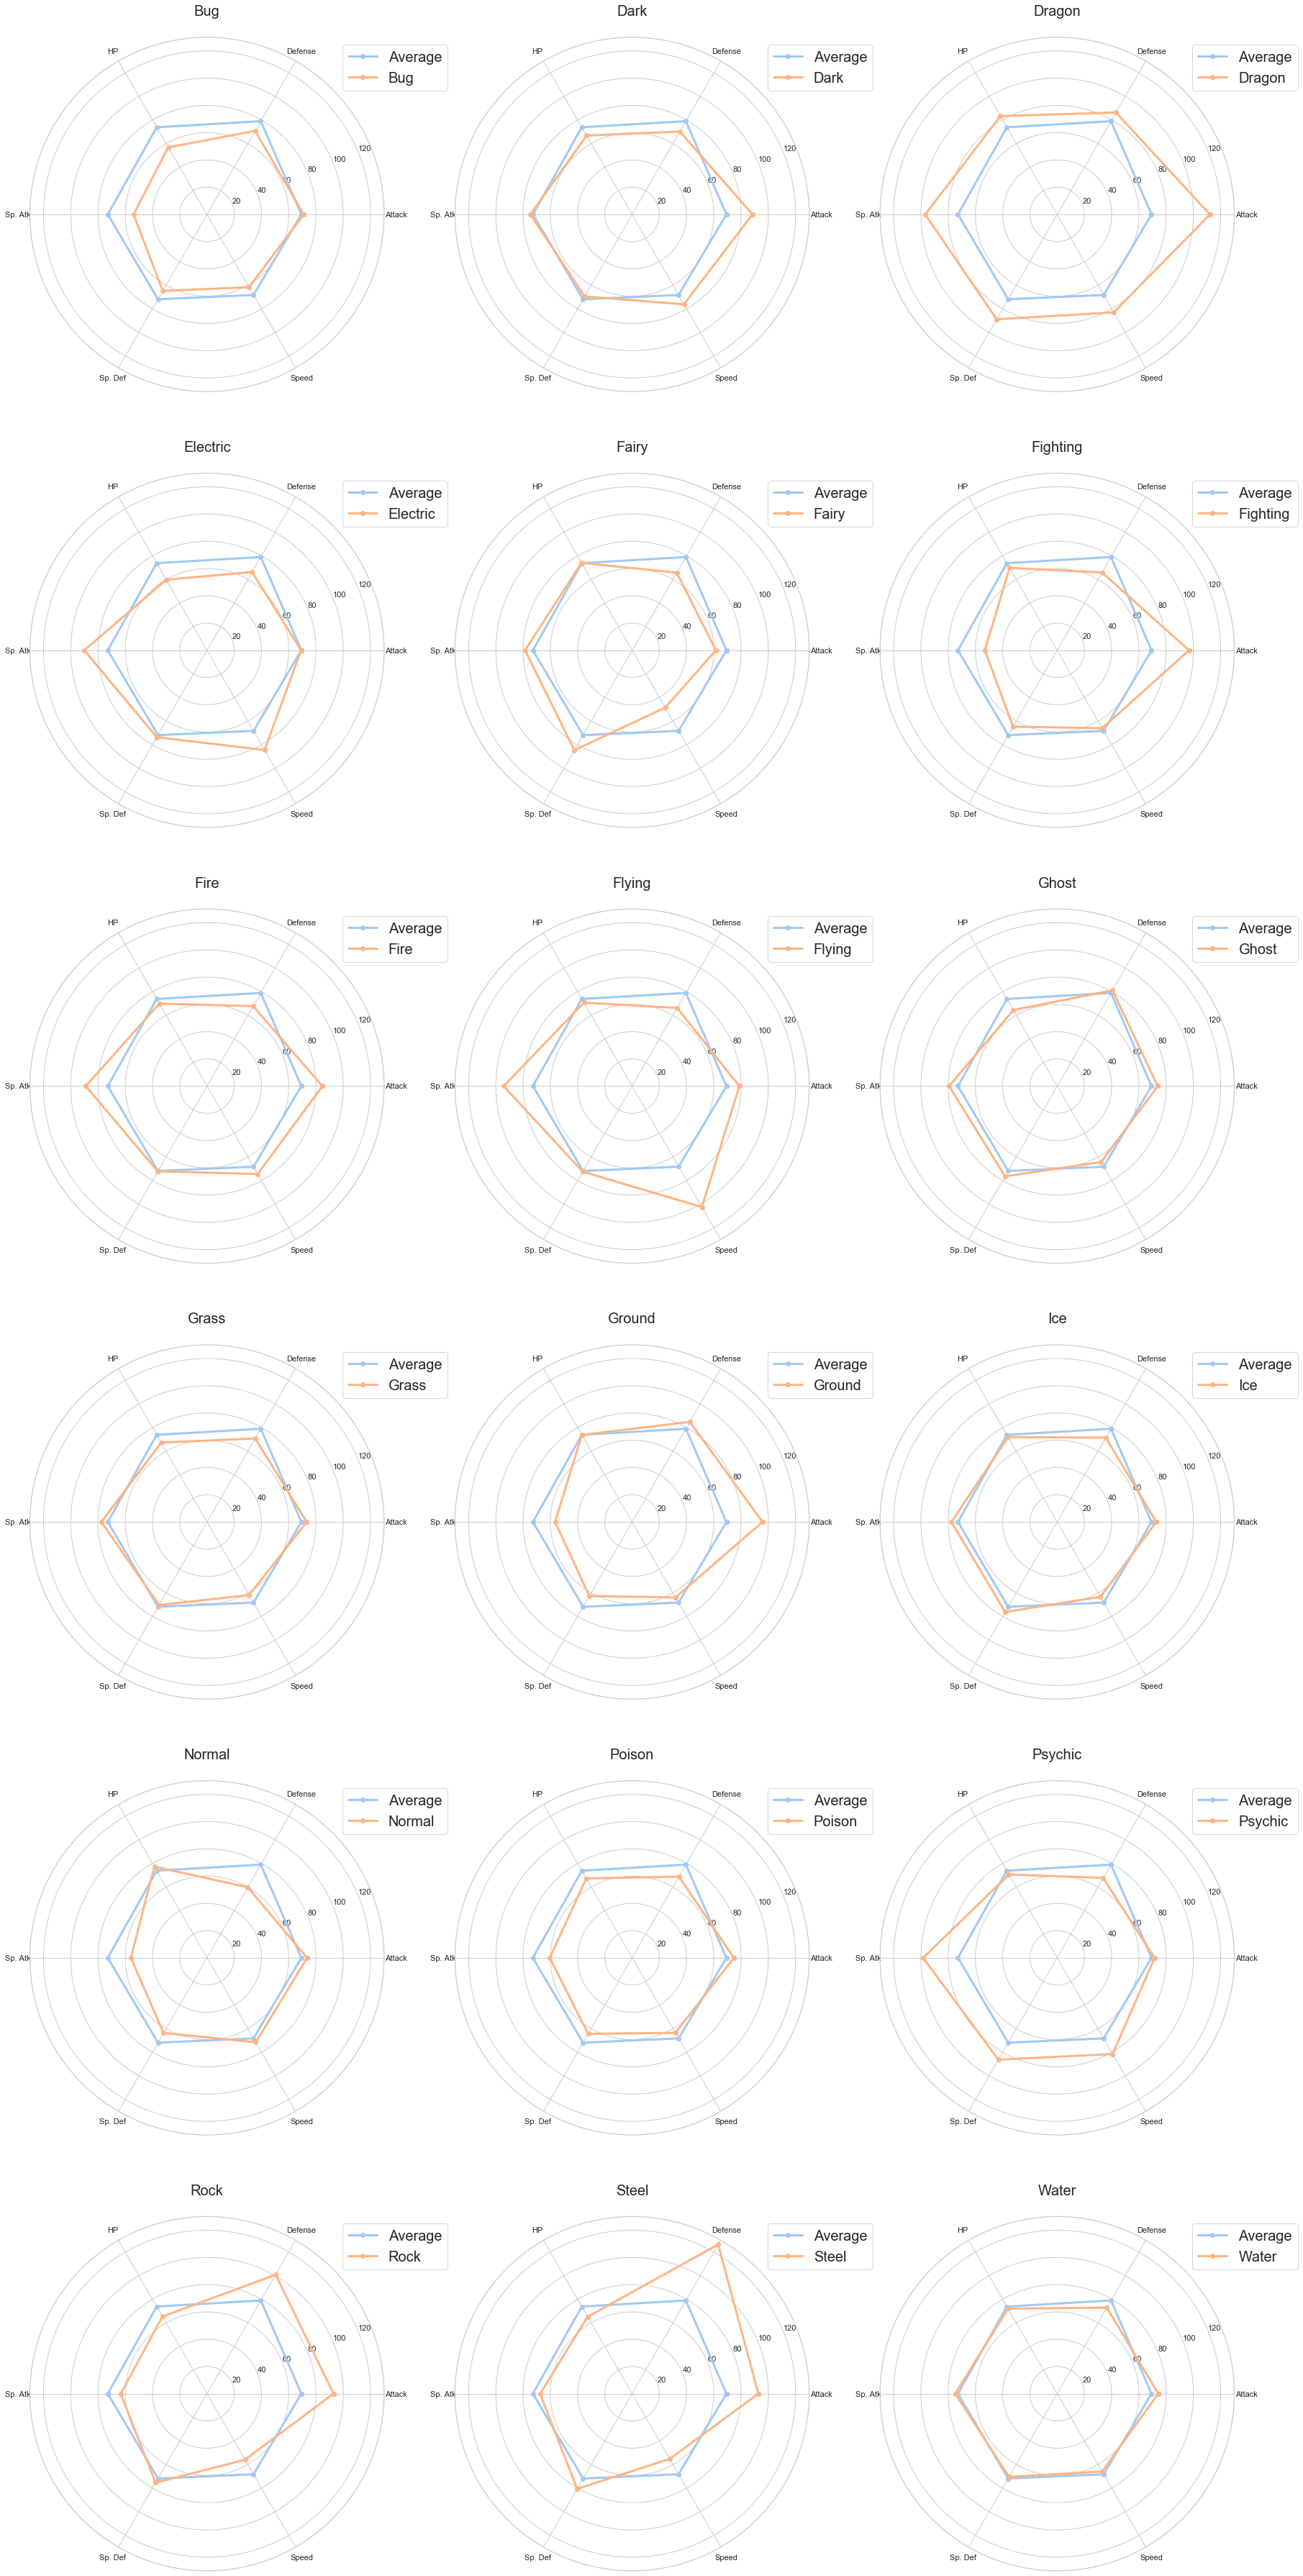

In [78]:
fig = plt.figure(figsize=(30,65))

for i in range(18):
    ax = fig.add_subplot(6, 3, i+1, polar=True)
    ax.plot(angles, data0, 'o-', linewidth=3, label='Average') 
    ax.plot(angles, datatype[i], 'o-', linewidth=3, label=list(type1_mean.index)[i])
    ax.set_thetagrids(angles * 180/np.pi, labels) 
    ax.set_ylim(0,130)  
    ax.set_title(list(type1_mean.index)[i], fontsize=20)
    ax.legend(fontsize=20, bbox_to_anchor=(1.2, 1));

Now we get 18 **radar maps**.

Radar map is a quite good way to describe the ability of these 18 types of Pokémon. They not only vividly depict the strengths and weaknesses of them in 6 dimentions, but also provide us a clear comparison between each type of Pokémon and the mean value of the total dataset.

These radar maps can inform us of lots of information, among which the relatively significant ones are:

- ***ALL ASPECTS***
 - **Dragon**: Their ability values of *ALL ASPECTS* are much higher than average.
- ***Attack***
 - Types that show a clear advantage: **Dark, Fighting, Ground, Rock, Steel**
- ***Defense***
 - Types that show a clear advantage: **Rock, Steel**
 - Types that show a clear disadvantage: **Normal, Electric, Fairy, Fighting, Flying**
- ***HP***
 - Types that show a clear disadvantage: **Bug, Electric**
- ***Sp. Atk***
 - Types that show a clear advantage: **Electric, Fire, Flying, Psychic**
 - Types that show a clear disadvantage: **Normal, Bug, Fighting, Ground** 
- ***Sp. Def***
 - Types that show a clear advantage: **Fairy, Psychic**
- ***Speed***
 - Types that show a clear advantage in: **Flying** and **Psychic**
 - Types that show a clear disadvantage: **Fairy, Steel**

- #### `PairGrid`

In addition to radar maps, we can also use **PairGrid** to plot pairwise comparison between different attributes. 

In [31]:
type1_mean.reset_index('Type 1')

variable,Type 1,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
0,Bug,70.971014,70.724638,56.884058,53.869565,64.797101,61.681159
1,Dark,88.387097,70.225806,66.806452,74.645161,69.516129,76.161290
2,Dragon,112.125000,86.375000,83.312500,96.843750,88.843750,83.031250
3,Electric,69.090909,66.295455,59.795455,90.022727,73.704545,84.500000
4,Fairy,61.529412,65.705882,74.117647,78.529412,84.705882,48.588235
5,Fighting,96.777778,65.925926,69.851852,53.111111,64.703704,66.074074
6,Fire,84.769231,67.769231,69.903846,88.980769,72.211538,74.442308
7,Flying,78.750000,66.250000,70.750000,94.250000,72.500000,102.500000
8,Ghost,73.781250,81.187500,64.437500,79.343750,76.468750,64.343750
9,Grass,73.214286,70.800000,67.271429,77.500000,70.428571,61.928571


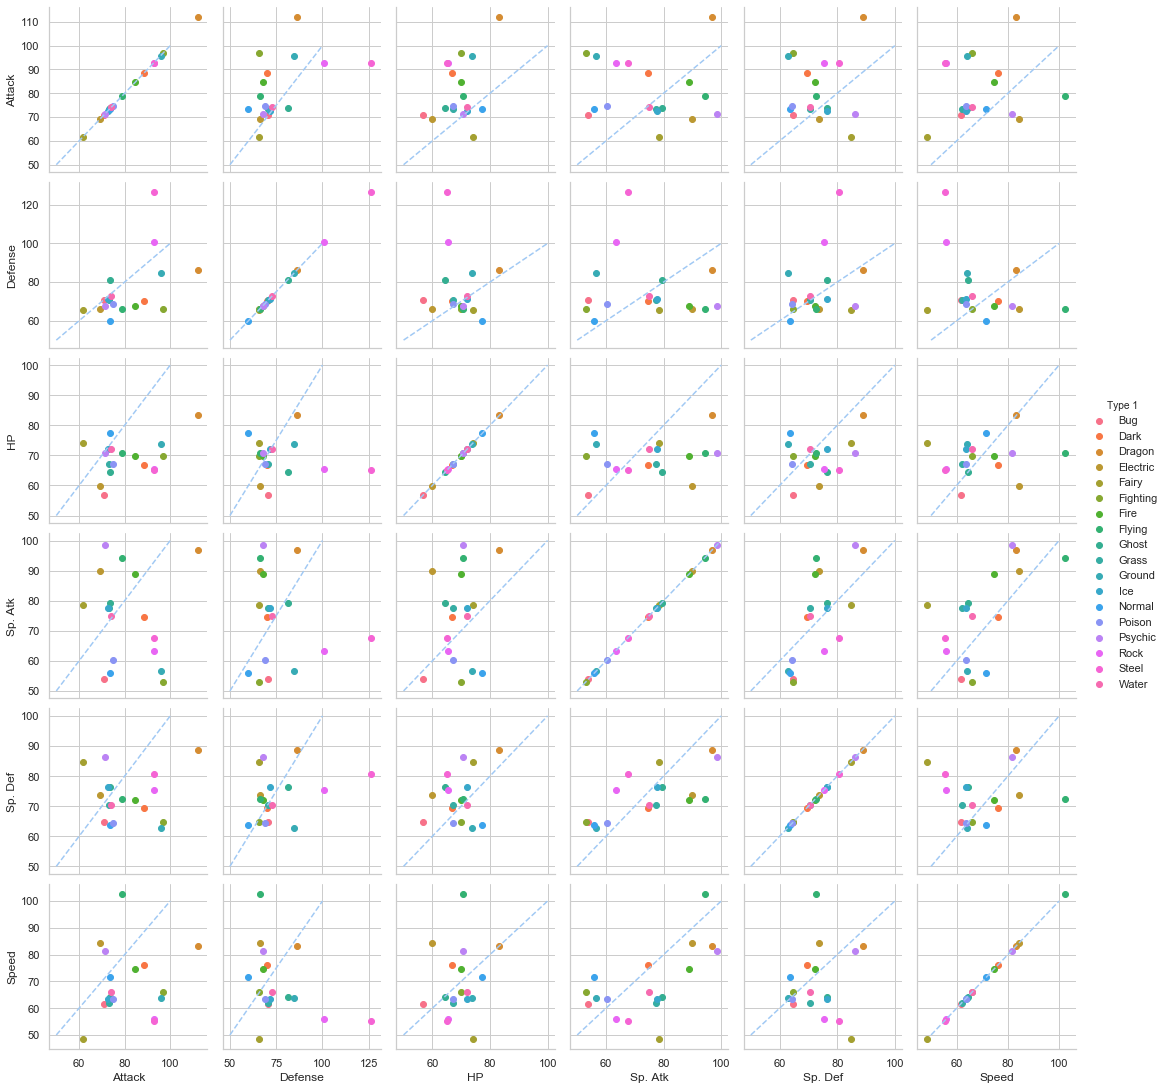

In [32]:
type1_PairGrid = sns.PairGrid(type1_mean.reset_index('Type 1'), 
                      vars=['Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Speed'],
                      hue='Type 1')
type1_PairGrid = (type1_PairGrid.map(plt.scatter)
          .add_legend())

# add a y=x line in each ax
for ax in type1_PairGrid.axes.flat:
    ax.plot((50, 100), (50, 100), ls="--");

In these graphs, dots in various colors represents different types. I added "y=x" line in each graph. If the dot is above the line, it means that the attribute of y-axis is higher than the attribute of x-axis, otherwise, the opposite.

With these graphs, we can freely check the size relationship between the corresponding values of any two attributes we want to know.

In a word, barplot1, radar maps and PairGrid graphs provided answers to the first question in different ways. 

Now let's think about the second question:
> *For each numeric attribute, which type performs best and which one is the worst?*

Actually barplot2 is fairly enough to answer this question. Here I plot 6 subplots to make more clear and more detailed analysis instead of using only one barplot.

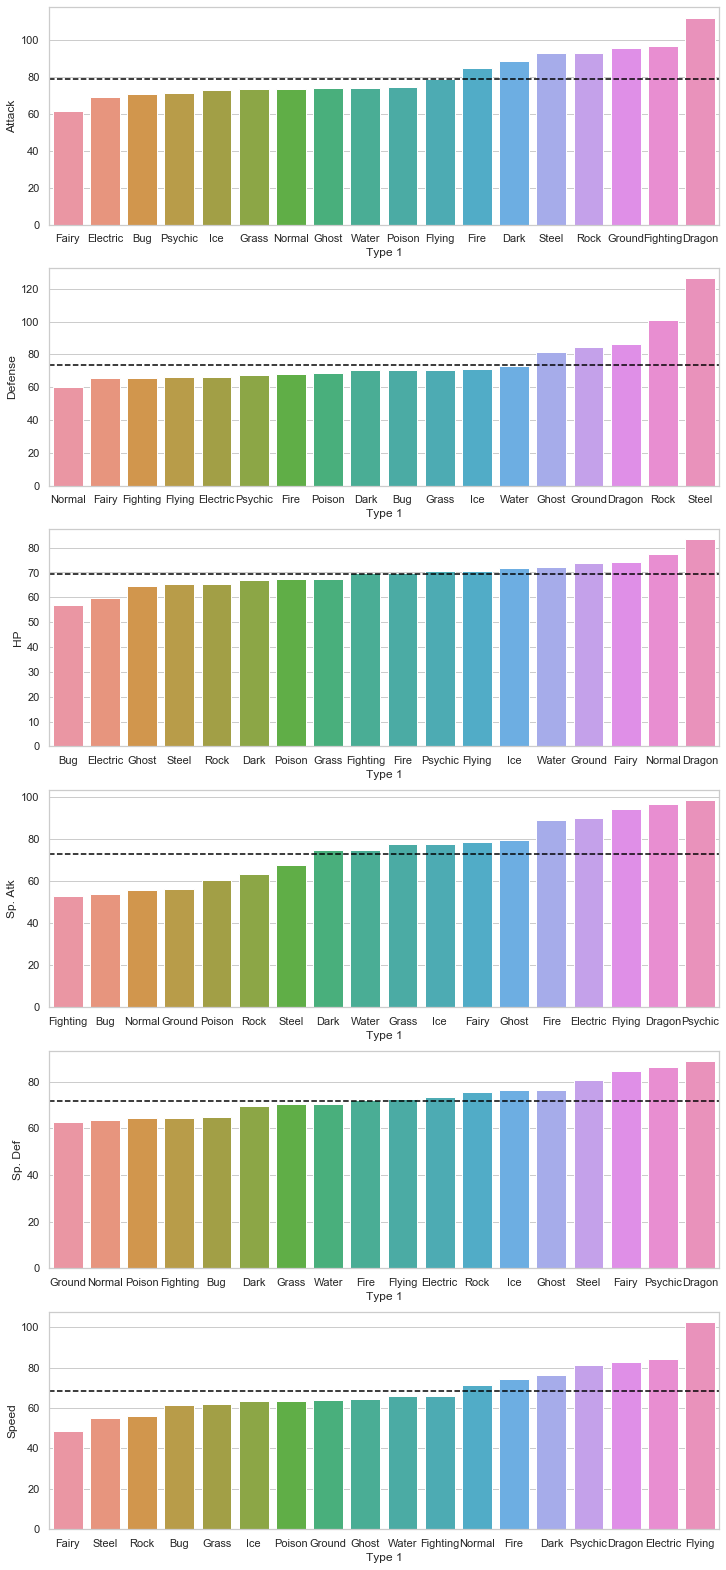

In [40]:
attributes = ['Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Speed']
average = [79.001250, 73.842500, 69.258750, 72.820000, 71.902500, 68.277500]
fig = plt.figure(figsize=(12,28))  

for i in range(6):
    ax = fig.add_subplot(6,1,i+1)  
    sns.barplot(x='Type 1', y=attributes[i], 
                data=type1_mean.reset_index('Type 1').sort_values(by=attributes[i]))
    plt.axhline(y=average[i],ls="--", c='black'); # average level of various attributes

According to the mean value of each attribute I've computed before, I added a horizontal line in each subplot so that we can easily tell which types are beyond the average level and which are lower than it.

At *2.3 About Type 1*, I've done relatively complete work to visualize this data grouped by **Type 1** with the help of pie chart, bar plot, radar map and pairgrid graph. It will be very similar to what I'm going to do with data that grouped by **Generation** and **Legendary**. The only difference is which indicator my data classification is based on.

### 2.4 About **Generation**

Let's start from composition Again.

In [41]:
# count the number of each generation
generation_count = pkm_raw["Generation"].value_counts()

generation_count

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

- #### `Pie Chart`

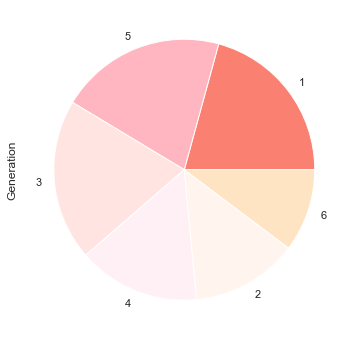

In [42]:
generation_pie = generation_count.plot.pie(colors=['#FA8072', '#FFB6C1', '#FFE4E1', 
                                                   '#FFF0F5', '#FFF5EE', '#FFE4C4'],
                                           figsize=(6,6))
generation_pie;

It's apparent that there are totally 6 generations and each generation accounts for similar proportion.

Then let's verify if there are any significant intergenerational differences.

- #### `Swarmplot`

Firstly, use **Swarmplot** to display the condition of data dispersion.

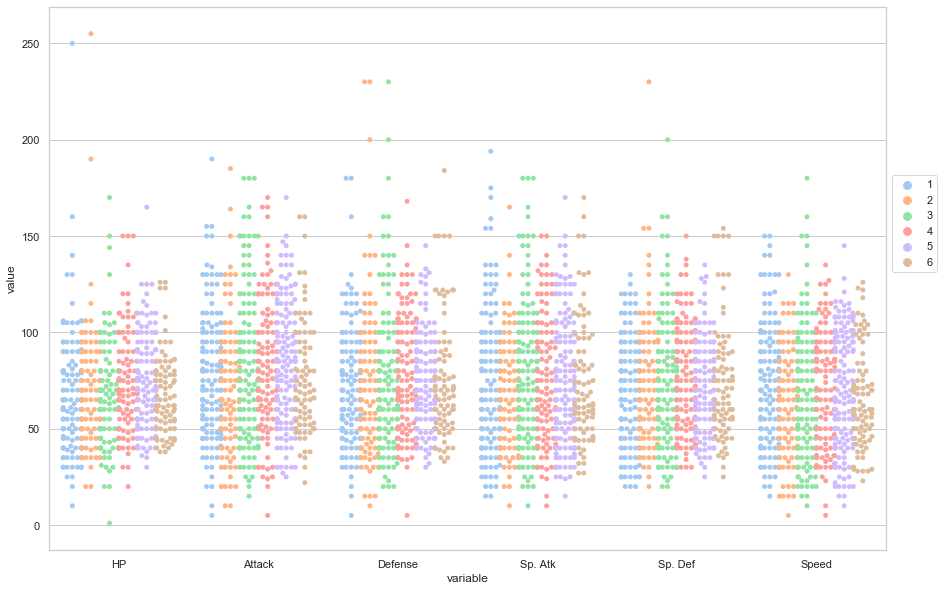

In [43]:
plt.figure(figsize=(15, 10))
generation_swarmplot = sns.swarmplot(x="variable", y="value", hue="Generation",
              data=pkm_long, dodge=True);
generation_swarmplot.legend(loc='best', bbox_to_anchor=(1, 0.7))
plt.show()

We can see that the abilities of Pokémon in each generation are almost evenly distributed. So We have reason to guess that the differences between generations are not significant.

Secondly, compute mean values of each numeric stats by generation and use bar charts for visualization.

In [44]:
pkm_wide2 = pkm_long.pivot_table(
    index="Type 1",
    columns=["Generation", "Name", "variable"],
    values="value"
)
generation_mean = pkm_wide2.stack(level="Name").mean().unstack()

generation_mean

variable,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,76.638554,70.861446,65.819277,71.819277,69.090361,72.584337
2,72.028302,73.386792,71.207547,65.943396,73.905660,61.811321
3,81.625000,74.100000,66.543750,75.806250,71.225000,66.925000
4,82.867769,78.132231,73.082645,76.404959,77.190083,71.338843
5,82.066667,72.327273,71.787879,71.987879,68.739394,68.078788
6,75.804878,76.682927,68.268293,74.292683,74.890244,66.439024


In [45]:
generation_mean.describe()

variable,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,78.505195,74.248445,69.451565,72.709074,72.506790,67.862886
std,4.339943,2.718001,2.992511,3.816966,3.378732,3.845763
min,72.028302,70.861446,65.819277,65.943396,68.739394,61.811321
25%,76.013297,72.592153,66.974886,71.861428,69.624021,66.560518
50%,79.131777,73.743396,69.737920,73.140281,72.565330,67.501894
75%,81.956250,76.037195,71.642796,75.427858,74.644098,70.523829
max,82.867769,78.132231,73.082645,76.404959,77.190083,72.584337


Concluding from the standard error and difference between maximum and minimum value, we can further infer that intergeneration difference is not significant.

Next, use bar charts to illustrate it more intuitively.

- #### `Bar Plot`

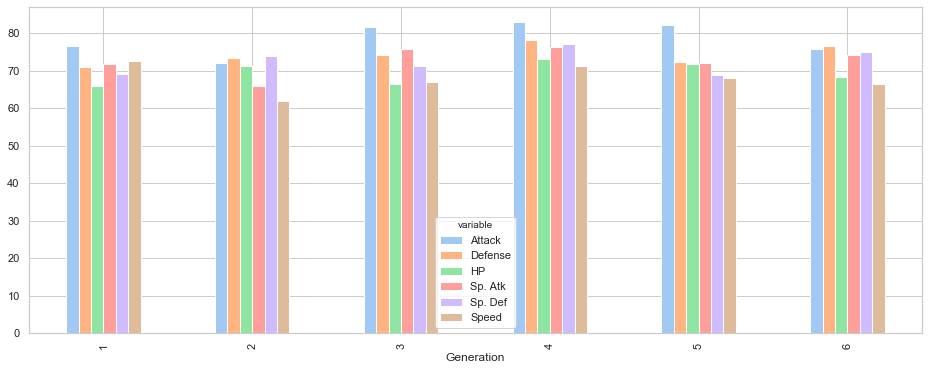

In [46]:
generation_barplot1 = generation_mean.plot.bar(figsize=[16,6])
generation_barplot1;

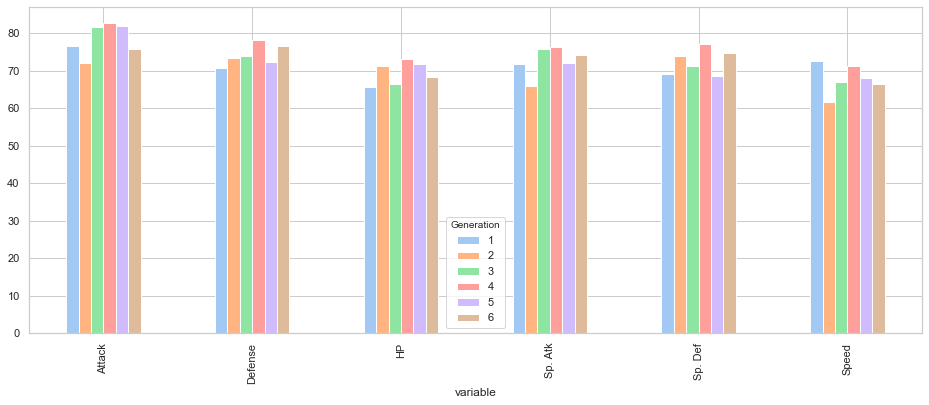

In [47]:
generation_barplot2 = generation_mean.T.plot.bar(figsize=[16,6])
generation_barplot2;

These two bar charts unfold that generation 4 performs slightly better than other generations. But overall, it makes little sense to compare between generations. This fact is consistent with its literal meaning - generation only represents the time when the Pokémon was created but has no other meanings. Hence, there is no need to do any further analysis or make any more visualization.

### 2.5 About **Legendary**

Repeat our previous process. Firstly, have a look at the proportion of **Legendary** Pokémon.

In [48]:
# count the number of legendary Pokémon
legendary_count = pkm_raw["Legendary"].value_counts()

legendary_count

False    735
True      65
Name: Legendary, dtype: int64

- #### `Pie Chart`

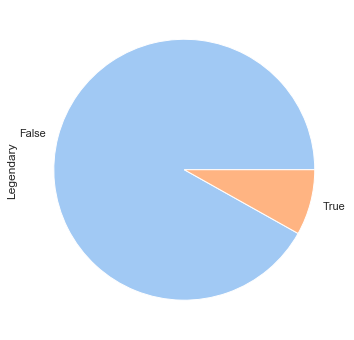

In [49]:
legendary_pie = legendary_count.plot.pie(figsize=(6,6))

legendary_pie;

It's obvious that only a small number of Pokémon are **Legendary**. This fact coincides with our intuition - "Legendary" is certainly not a common description. According to its literal meaning, we can draw a speculation that legendary Pokémon performs much better than others when in a combat.

- #### `Violinplot`

Considering that there are only two groups - *True* and *False*, **violinplot** is a better choice than swarmplot.

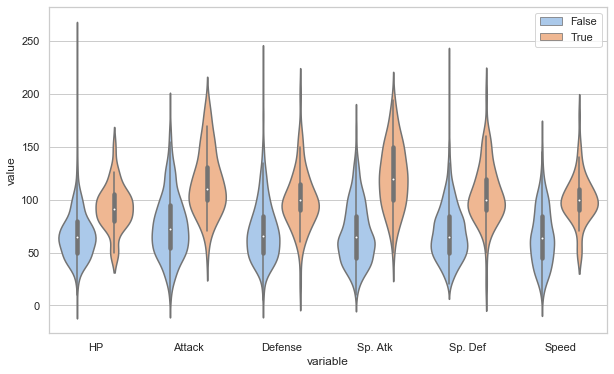

In [50]:
plt.figure(figsize=(10, 6))
legendary_violinplot = sns.violinplot(x="variable", y="value", hue="Legendary",
              data=pkm_long);
legendary_violinplot.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

The violinplot informs us that the various abilities of Legendary Pokémon are significantly higher than other Pokémon which are not legendary.

Secondly, compute mean values of each numeric stats by **Legendary** and use bar charts for visualization.

In [51]:
pkm_wide3 = pkm_long.pivot_table(
    index="Type 1",
    columns=["Legendary", "Name", "variable"],
    values="value"
)
legendary_mean = pkm_wide3.stack(level="Name").mean().unstack()

legendary_mean

variable,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Legendary,,,,,,
False,75.669388,71.559184,67.182313,68.454422,68.892517,65.455782
True,116.676923,99.661538,92.738462,122.184615,105.938462,100.184615


The difference between average abilities of these two kinds of Pokémon is between about 25 to 54. Now we are sure that Legendary Pokémon is more powerful in every aspect than those who are not.

Next, use `barplot`, `radar map` and `scatterplot` these approaches to dispaly this discrepancy.

- #### `Bar Chart`

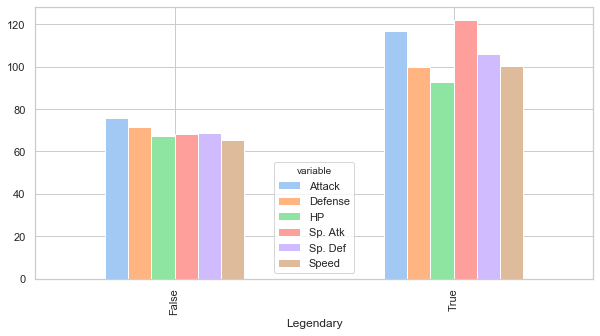

In [52]:
legendary_barplot1 = legendary_mean.plot.bar(figsize=[10,5])
legendary_barplot1;

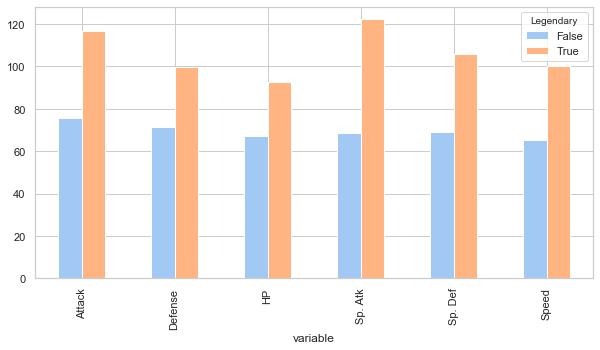

In [53]:
legendary_barplot2 = legendary_mean.T.plot.bar(figsize=[10,5])
legendary_barplot2;

- #### `Radar Map`

In [54]:
labels = np.array(['Attack','Defense', 'HP', 'Sp. Atk','Sp. Def','Speed'])
dataLenth = 6 # the length of data

data_false = [75.669388, 71.559184, 67.182313, 68.454422, 68.892517, 65.455782]
data_true  = [116.676923, 99.661538, 92.738462, 122.184615, 105.938462, 100.184615]


angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
data_false = np.concatenate((data_false, [data_false[0]]))
data_true = np.concatenate((data_true, [data_true[0]]))

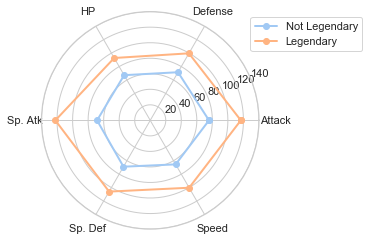

In [55]:
plt.polar(angles, data_false, 'o-', linewidth=2, label='Not Legendary') 
plt.polar(angles, data_true, 'o-', linewidth=2, label='Legendary')

plt.thetagrids(angles * 180/np.pi, labels) 
plt.ylim(0,140) # set the value of radius
plt.legend(bbox_to_anchor=(1.5, 1));

- #### `Scatterplot`

Reshape the dataframe to facilitate plotting.

In [56]:
legendary_mean.reset_index('Legendary')

variable,Legendary,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
0,False,75.669388,71.559184,67.182313,68.454422,68.892517,65.455782
1,True,116.676923,99.661538,92.738462,122.184615,105.938462,100.184615


In [57]:
legendary_mean_scatter = legendary_mean.reset_index('Legendary'
                                                   ).T.drop(index='Legendary').reset_index('variable')
legendary_mean_scatter

,variable,0,1
0,Attack,75.6694,116.677
1,Defense,71.5592,99.6615
2,HP,67.1823,92.7385
3,Sp. Atk,68.4544,122.185
4,Sp. Def,68.8925,105.938
5,Speed,65.4558,100.185


Use scatterplot to make a comparison between these two groups.

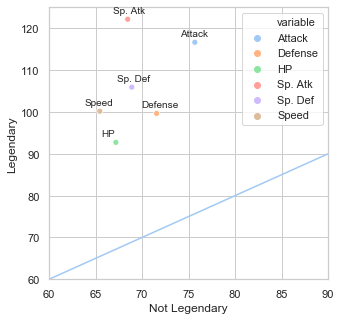

In [70]:
# scatterplot
fig = plt.figure(figsize=(5, 5))
ax = sns.scatterplot(x=0, y=1,
                     hue="variable",
                     data=legendary_mean_scatter)

ax.set_xlim((60,90)) # set the horizontal boundary of the chart
ax.set_ylim((60,125)) # set the vertical boundary of the chart
ax.set_xlabel('Not Legendary') # set a label for x-axis
ax.set_ylabel('Legendary') # set a label for y-axis

ax.plot((60,125),(60,125)) # add a y=x line

# set a label for each dot
x=list(legendary_mean_scatter[0])
y=list(legendary_mean_scatter[1])
attribute = list(legendary_mean_scatter['variable'])
for i in range(6):
    ax.annotate(attribute[i],xy=(x[i], y[i]), xycoords="data",
        xytext=(-15, 6), textcoords="offset points",
); 

In this scatterplot, each dot represents a kind of basic stats, using the average of **Not Legendary** as its abscissa and the average of **Legendary** as its ordinate. 
I added a y=x line in this plot. As we can see, all the dots are above this line, which means Legendary Pokémon has higher score in all aspects than those who are not legendary.

## 3 Summary

With the help of various charts and graphs plotted by `Matplotlib.pyplot`, `pandas.plotting` and `seaborn`, I've done my analysis and visualization on `Pokémon.csv`. 

At the end, summarize my report as the following aspects:

> #### Basic statistics of the whole dataset 
> - *with a boxplot*
> 
> #### Top 10 Pokémon with highest/lowest **Total** value
> - *with 8 pie charts*
>
> #### About **Type 1**
> - ##### composition proportion
>  - *with a pie chart*
> - ##### distritutions between different types
>  - *with a violinplot and a swarmplot*
> - ##### inter-type comparison
>  - *with two barplots, 18 radar maps, PairGrid and 6 sub-barplots*
> 
> #### About **Generation**
> - ##### composition proportion
>  - *with a pie chart*
> - ##### distritutions between different generations
>  - *with a swarmplot*
> - ##### intergeneration comparison
>  - *with two bar charts*
>
>
> #### About **Legendary**
> - ##### composition proportion
>  - *with a pie chart*
> - ##### distritutions between different classification
>  - *with a violinplot*
> - ##### comparison between **Legendary** and **Not Legendary**
>  - *with two bar charts, one radar map and one scatterplot*